In [42]:
import sys
sys.path.append('/Users/leah/Columbia/courses/19summer/SocialBehavior/SocialBehaviorptc')

In [43]:
from ssm_ptc.models.hmm import HMM
from ssm_ptc.distributions.sigmoidnormal import SigmoidNormal
from ssm_ptc.observations.ar_sigmoid_normal_observation import ARSigmoidNormalObservation
from ssm_ptc.transformations.linear import LinearTransformation
from ssm_ptc.utils import find_permutation, random_rotation, k_step_prediction


import torch
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

# Try to see what different alphas would look like

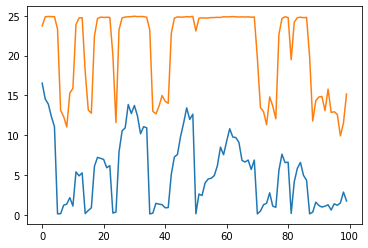

In [44]:
torch.manual_seed(0)

K = 3
D = 2
T = 100

As = [random_rotation(D) for _ in range(K)]
true_tran = LinearTransformation(K=K, D=D, lags=1, As=As)

bounds = np.array([[0, 20], [-5, 25]])
mus_init = np.tile([[10, 15]], (K, 1))


true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=true_tran,
                                              mus_init=mus_init, bounds=bounds, alpha=0.2)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy());

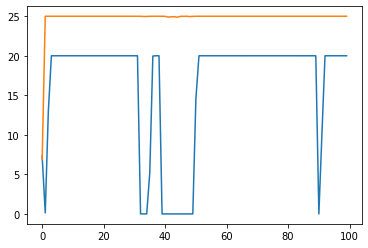

In [7]:
true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=true_tran, bounds=bounds, alpha=1.0)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy());

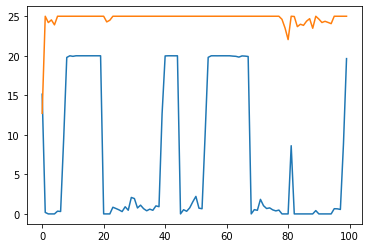

In [8]:
true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=true_tran, bounds=bounds, alpha=0.5)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy());

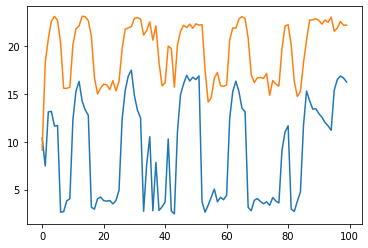

In [9]:
true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=true_tran, bounds=bounds, alpha=0.1)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy())

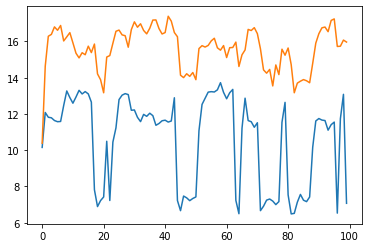

In [10]:
true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=true_tran, bounds=bounds, alpha=0.05)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy())

# now do model fitting

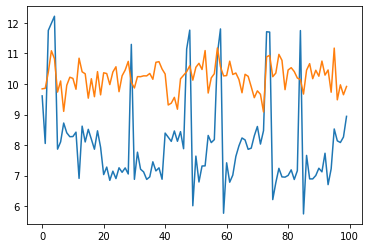

In [45]:
As = npr.randn(K, D, D) * 0.5

true_tran = LinearTransformation(K=K, D=D, lags=1, As=As)
bounds = np.array([[0, 20], [-5, 25]])

true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=true_tran, bounds=bounds, alpha=0.05)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy());

In [46]:
tran = LinearTransformation(K=K, D=D, lags=1)
observation = ARSigmoidNormalObservation(K=K, D=D, M=0, transformation=tran, bounds=bounds, alpha=0.05)
model = HMM(K=K, D=D, M=0, observation=observation)

In [47]:
model.loss(data)

tensor(6864.9721, dtype=torch.float64, grad_fn=<MulBackward0>)

In [48]:
true_model.loss(data)

tensor(105.5930, dtype=torch.float64, grad_fn=<MulBackward0>)

In [49]:
num_iters = 15000

pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer = torch.optim.Adam(model.params, lr=0.001)

losses = []
for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)    
    loss.backward(retain_graph=True)
    optimizer.step()
    
    loss = loss.detach().numpy()
    losses.append(loss)
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)

In [16]:
num_iters = 15000

pbar = tqdm(total=num_iters, file=sys.stdout)

for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)    
    loss.backward(retain_graph=True)
    optimizer.step()
    
    loss = loss.detach().numpy()
    losses.append(loss)
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)

In [17]:
num_iters = 15000

pbar = tqdm(total=num_iters, file=sys.stdout)

for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)    
    loss.backward(retain_graph=True)
    optimizer.step()
    
    loss = loss.detach().numpy()
    losses.append(loss)
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)

In [18]:
num_iters = 15000

pbar = tqdm(total=num_iters, file=sys.stdout)

for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)    
    loss.backward(retain_graph=True)
    optimizer.step()
    
    loss = loss.detach().numpy()
    losses.append(loss)
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)

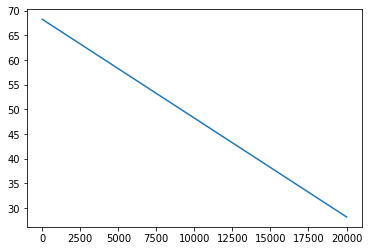

In [19]:
plt.plot(losses[40000:])

In [23]:
infer_z = model.most_likely_states(data)

perm = find_permutation(z.numpy(), infer_z, K1=K, K2=K)

model.permute(perm)
hmm_z = model.most_likely_states(data)


In [24]:
x_predict_arr = k_step_prediction(model, hmm_z, data)

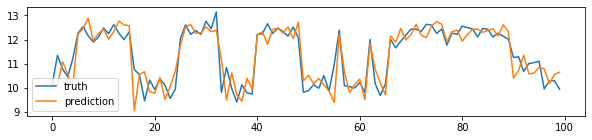

In [25]:
plt.figure(figsize=(10,2))
plt.plot(data[:,0].numpy(), label='truth')
plt.plot(x_predict_arr[:,0], label='prediction')
plt.legend();

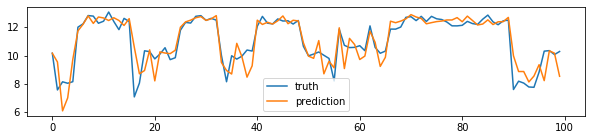

In [26]:
plt.figure(figsize=(10,2))
plt.plot(data[:,1].numpy(), label='truth')
plt.plot(x_predict_arr[:,1], label='prediction')
plt.legend();

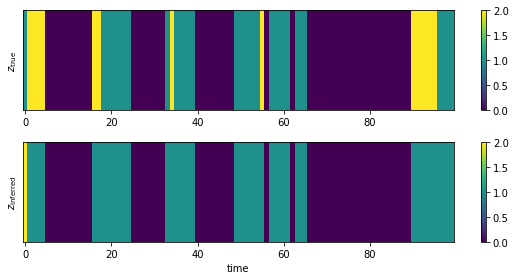

In [27]:
# Plot the true and inferred discrete states
slc = slice(0, T)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(z[None, slc], aspect="auto")
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])
plt.colorbar()

plt.subplot(212)
plt.imshow(hmm_z[None,slc], aspect="auto")
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")
plt.colorbar()

plt.tight_layout()

# check for lags=2

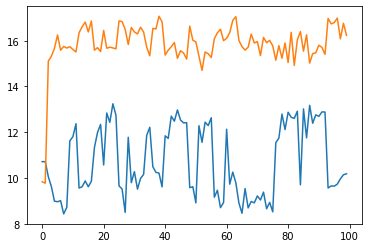

In [30]:
true_tran = LinearTransformation(K=K, D=D, lags=2)
bounds = np.array([[0, 20], [-5, 25]])

true_observation = ARSigmoidNormalObservation(K=K, D=D, M=0, lags=2, transformation=true_tran, bounds=bounds, alpha=0.05)

true_model = HMM(K=K, D=D, M=0, observation=true_observation)

z, data = true_model.sample(T, return_np=False)

plt.plot(data.numpy());

In [32]:
tran = LinearTransformation(K=K, D=D, lags=2)
observation = ARSigmoidNormalObservation(K=K, D=D, M=0, lags=2,transformation=tran, bounds=bounds, alpha=0.05)
model = HMM(K=K, D=D, M=0, observation=observation)

In [33]:
model.loss(data)

tensor(606.0728, dtype=torch.float64, grad_fn=<MulBackward0>)

In [34]:
true_model.loss(data)

tensor(97.0089, dtype=torch.float64, grad_fn=<MulBackward0>)

In [35]:
num_iters = 40000

pbar = tqdm(total=num_iters, file=sys.stdout)

optimizer = torch.optim.Adam(model.params, lr=0.001)

losses = []
for i in np.arange(num_iters):

    optimizer.zero_grad()

    loss = model.loss(data)    
    loss.backward(retain_graph=True)
    optimizer.step()
    
    loss = loss.detach().numpy()
    losses.append(loss)
    
    if i % 10 == 0:
        pbar.set_description('iter {} loss {:.2f}'.format(i, loss))
        pbar.update(10)

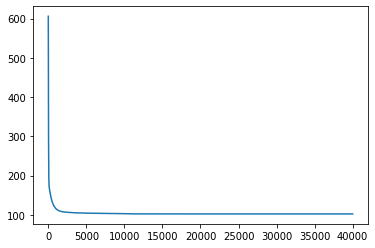

In [36]:
plt.plot(losses)

In [37]:
infer_z = model.most_likely_states(data)

perm = find_permutation(z.numpy(), infer_z, K1=K, K2=K)

model.permute(perm)
hmm_z = model.most_likely_states(data)


In [38]:
x_predict_arr = k_step_prediction(model, hmm_z, data)

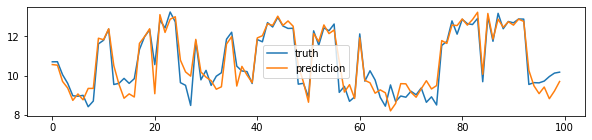

In [39]:
plt.figure(figsize=(10,2))
plt.plot(data[:,0].numpy(), label='truth')
plt.plot(x_predict_arr[:,0], label='prediction')
plt.legend();

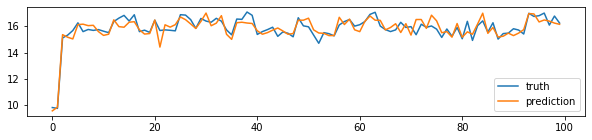

In [40]:
plt.figure(figsize=(10,2))
plt.plot(data[:,1].numpy(), label='truth')
plt.plot(x_predict_arr[:,1], label='prediction')
plt.legend();

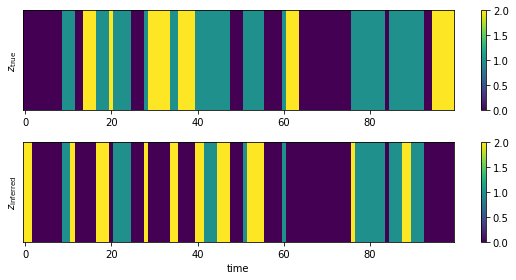

In [41]:
# Plot the true and inferred discrete states
slc = slice(0, T)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(z[None, slc], aspect="auto")
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])
plt.colorbar()

plt.subplot(212)
plt.imshow(hmm_z[None,slc], aspect="auto")
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")
plt.colorbar()

plt.tight_layout()